# Fase 1: Análisis Exploratorio de Datos (EDA) - Propiedades en Venta

**Objetivo:** Entender al 100% la estructura, contenido y calidad del dataset de propiedades en venta antes de planificar cualquier limpieza o desarrollo.

In [1]:
import pandas as pd

file_path = '../data/ventas_deptos.pkl'
df = pd.read_pickle(file_path)

print("Dataset cargado exitosamente.")

Dataset cargado exitosamente.


## 1. Análisis de Estructura y Tipos de Datos (`.info()`)
El primer paso es obtener un resumen técnico del DataFrame. Buscamos el número de filas, columnas, tipos de datos y la presencia de valores nulos.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50691 entries, 0 to 50690
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              50691 non-null  object        
 1   Price           50691 non-null  object        
 2   Location        50691 non-null  object        
 3   Address         50691 non-null  object        
 4   Features        50691 non-null  object        
 5   Description     50691 non-null  object        
 6   Expensas        32656 non-null  object        
 7   Link            50691 non-null  object        
 8   scrap_date      50691 non-null  datetime64[us]
 9   type_building   50691 non-null  object        
 10  type_operation  50691 non-null  object        
dtypes: datetime64[us](1), object(10)
memory usage: 4.3+ MB


## 2. Inspección Visual de los Datos (`.head()`)
Ahora, observamos una muestra de las primeras 10 filas para entender el formato real del contenido y contextualizar los hallazgos de `.info()`.

In [3]:
df.head(10)

,id,Price,Location,Address,Features,Description,Expensas,Link,scrap_date,type_building,type_operation
0,54486703,USD 94.500,"Palermo, Capital Federal",Gascón al 900,"[50 m² tot., 3 amb., 2 dorm., 1 baño]","Venta departamento de 3 ambientes con balcón, ...",$ 18.000 Expensas,https://www.zonaprop.com.ar/propiedades/clasif...,2024-09-24 14:20:03.244872,departamentos,venta
1,54321873,USD 190.000,"Recoleta, Capital Federal",Uriburu al 1000,"[93 m² tot., 4 amb., 3 dorm., 1 baño, 1 coch.]",Ventaluminoso departamento de 4 ambientes con ...,$ 300.000 Expensas,https://www.zonaprop.com.ar/propiedades/clasif...,2024-09-24 14:20:03.244872,departamentos,venta
2,54427819,USD 44.500,"Monserrat, Capital Federal",Solís 700,"[29 m² tot., 2 amb., 1 dorm., 1 baño]",Corredor Responsable: Ariel Champanier cucicba...,$ 85.000 Expensas,https://www.zonaprop.com.ar/propiedades/clasif...,2024-09-24 14:20:03.244872,departamentos,venta
3,51732991,USD 327.420,"Retiro, Capital Federal",Av. Santa Fe 700,"[78 m² tot., 1 amb.]",Departamento o estudio profesional.,NaN,https://www.zonaprop.com.ar/propiedades/clasif...,2024-09-24 14:20:03.244872,departamentos,venta
4,54332018,USD 345.000,"Belgrano, Capital Federal",Amenábar 1700,"[159 m² tot., 4 amb., 4 dorm., 2 baños, 1 coch.]",Corredor Responsable: Raul Hector Merlo cucicb...,$ 450.000 Expensas,https://www.zonaprop.com.ar/propiedades/clasif...,2024-09-24 14:20:03.244872,departamentos,venta
5,54380514,USD 148.700,"Caballito, Capital Federal",Prima Caballito - 2 Ambientes,"[50 m² tot., 2 amb., 1 dorm., 1 baño]",Departamento en venta de 2 ambientes a estrena...,NaN,https://www.zonaprop.com.ar/propiedades/clasif...,2024-09-24 14:20:03.244872,departamentos,venta
6,54502925,USD 73.000,"Parque Chas, Capital Federal",Llerena 2655 3,"[40 m² tot., 1 amb., 1 baño]",¡venta departamento monoambiente con balcón en...,$ 40.000 Expensas,https://www.zonaprop.com.ar/propiedades/clasif...,2024-09-24 14:20:03.244872,departamentos,venta
7,52509881,USD 105.600,"Palermo, Capital Federal",Piso 10 - Monoambiente - Zapata 100,"[65 m² tot., 1 amb., 1 dorm., 1 baño]",Monoambiente con balconcontacto WhatsApp: gp V...,NaN,https://www.zonaprop.com.ar/propiedades/clasif...,2024-09-24 14:20:03.244872,departamentos,venta
8,51715996,USD 600.000,"Palermo, Capital Federal",Castex al 3300,"[150 m² tot., 3 amb., 1 dorm., 2 baños]","Departamento moderno, todo nuevo. Living-comed...",$ 52.632 Expensas,https://www.zonaprop.com.ar/propiedades/clasif...,2024-09-24 14:20:03.244872,departamentos,venta
9,51604085,USD 110.200,"Núñez, Capital Federal",Vidal 2910,"[37 m² tot., 1 amb., 1 baño]","Bienvenidos al emprendimiento Altos de Vidal, ...",NaN,https://www.zonaprop.com.ar/propiedades/clasif...,2024-09-24 14:20:03.244872,departamentos,venta


## 3. Distribución de Datos Categóricos (`.value_counts()`)
Analizamos la columna `Location` para entender cómo se distribuyen geográficamente las propiedades y detectar posibles inconsistencias.

In [4]:
df['Location'].value_counts()

Location
Belgrano, Capital Federal        4943
Palermo, Capital Federal         4361
Recoleta, Capital Federal        4143
Caballito, Capital Federal       3286
Núñez, Capital Federal           2193
                                 ... 
Floresta Sur, Floresta              5
Puerto Retiro, Retiro               4
Naón, Mataderos                     4
Botánico, Recoleta                  2
Palermo Hollywood, Colegiales       2
Name: count, Length: 86, dtype: int64

## 4. Análisis Estadístico de la Variable Principal (`Price`)
Dado que `Price` es de tipo `object`, realizamos una conversión temporal **solo para fines de análisis** y así poder calcular sus estadísticas descriptivas. Esto nos revelará la presencia de outliers y la dispersión de los precios.

In [5]:
# Creamos una copia temporal para no modificar nuestro DataFrame original
price_numeric = df['Price'].copy()

# 1. Quitamos el prefijo 'USD'
price_numeric = price_numeric.str.replace('USD ', '', regex=False)
# 2. Quitamos el punto de los miles
price_numeric = price_numeric.str.replace('.', '', regex=False)
# 3. Lo convertimos a un tipo de dato numérico (errores se convierten en NaT)
price_numeric = pd.to_numeric(price_numeric, errors='coerce')

# 4. Obtenemos las estadísticas descriptivas
print("Estadísticas Descriptivas para 'Price':")
print(price_numeric.describe())

Estadísticas Descriptivas para 'Price':
count    5.031700e+04
mean     2.872503e+05
std      4.074149e+05
min      1.000000e+00
25%      1.070000e+05
50%      1.650000e+05
75%      2.950000e+05
max      1.200000e+07
Name: Price, dtype: float64


# Informe Final de la Fase 1: Descubrimiento

### 1. Estructura General del Dataset:
* El conjunto de datos consta de **50,691 registros** (propiedades) y **11 columnas**.
* La mayoría de las columnas están completas, a excepción de `Expensas`.

### 2. Problemas Críticos de Calidad de Datos:

* **Valores Nulos:**
    * La columna `Expensas` es el problema más evidente, con aproximadamente un **36% de sus valores nulos**.

* **Formato de Datos Numéricos:**
    * Las columnas `Price` y `Expensas` están incorrectamente tipadas como `object` debido a la inclusión de texto (`USD `) y separadores de miles (`.`).
    * Se detectaron **374 registros** en `Price` con formatos que impidieron una conversión numérica simple.

* **Inconsistencia en Datos Categóricos:**
    * La columna `Location` presenta problemas de granularidad, mezclando barrios principales con sub-zonas (ej: `"Botánico, Recoleta"`).

* **Valores Atípicos y Anómalos (Outliers):**
    * La columna `Price` contiene datos ilógicos, como un valor **mínimo de `USD 1`**.
    * La gran diferencia entre el precio promedio (`$287k`) y la mediana (`$165k`) confirma la presencia de valores extremos que distorsionan las métricas.

### 3. Características Clave del Negocio:

* **Distribución Geográfica:** El mercado está fuertemente concentrado en **Belgrano, Palermo y Recoleta**.
* **Tipo de Operación:** El dataset se enfoca exclusivamente en listados de **venta** de **departamentos**.

## 5. Análisis Visual Profundo desde la Base de Datos
Ahora que entendemos la estructura básica, nos conectaremos a la base de datos MySQL donde residen los datos limpios para realizar un análisis visual más profundo.

In [6]:
import mysql.connector
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path='../.env') # Subir un nivel para encontrar .env

def get_db_connection():
    try:
        connection = mysql.connector.connect(
            host=os.getenv("DB_HOST"),
            user=os.getenv("DB_USER"),
            password=os.getenv("DB_PASSWORD"),
            database=os.getenv("DB_NAME")
        )
        print("Conexión a la base de datos exitosa.")
        return connection
    except mysql.connector.Error as err:
        print(f"Error al conectar a la base de datos: {err}")
        return None

conn = get_db_connection()

Conexión a la base de datos exitosa.


### 5.1. Análisis de Precio por Metro Cuadrado
El precio absoluto no cuenta toda la historia. Normalizar el precio por la superficie (m²) nos da una métrica mucho más comparable entre propiedades de diferentes tamaños y es un indicador clave en el mercado inmobiliario.

/var/folders/nd/dy1shnbn2797hcxgrvjct5gh0000gn/T/ipykernel_4548/1839377973.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_precio_m2 = pd.read_sql(query, conn)
/var/folders/nd/dy1shnbn2797hcxgrvjct5gh0000gn/T/ipykernel_4548/1839377973.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_precio_m2, y='barrio', x='precio_m2_usd', palette="magma")


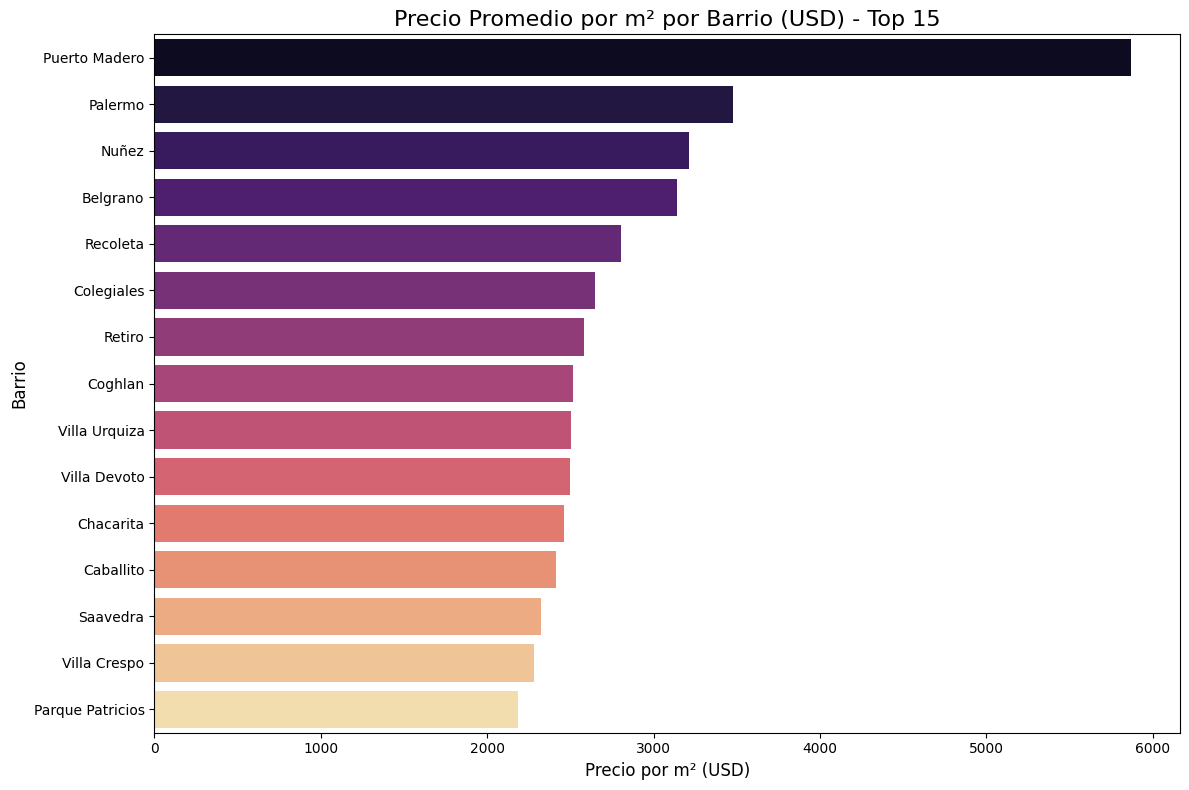

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

output_dir = "../docs/images"
os.makedirs(output_dir, exist_ok=True)

query = """
    SELECT barrio, AVG(price_usd / superficie_total_m2) as precio_m2_usd
    FROM propiedades
    WHERE price_usd IS NOT NULL AND superficie_total_m2 > 0
    GROUP BY barrio
    HAVING COUNT(*) > 50
    ORDER BY precio_m2_usd DESC
    LIMIT 15;
"""
df_precio_m2 = pd.read_sql(query, conn)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_precio_m2, y='barrio', x='precio_m2_usd', palette="magma")
plt.title('Precio Promedio por m² por Barrio (USD) - Top 15', fontsize=16)
plt.xlabel('Precio por m² (USD)', fontsize=12)
plt.ylabel('Barrio', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "precio_m2_por_barrio.png"))
plt.show()

### 5.2. Distribución de Precios en Barrios Clave
Un promedio puede ser engañoso. Un box plot nos muestra la mediana, los percentiles y los valores atípicos, dándonos una idea clara de la dispersión de precios en los barrios más representativos del mercado.

/var/folders/nd/dy1shnbn2797hcxgrvjct5gh0000gn/T/ipykernel_4548/588251509.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dist = pd.read_sql(query_dist, conn)


/var/folders/nd/dy1shnbn2797hcxgrvjct5gh0000gn/T/ipykernel_4548/588251509.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dist, x='barrio', y='price_usd', palette="coolwarm")


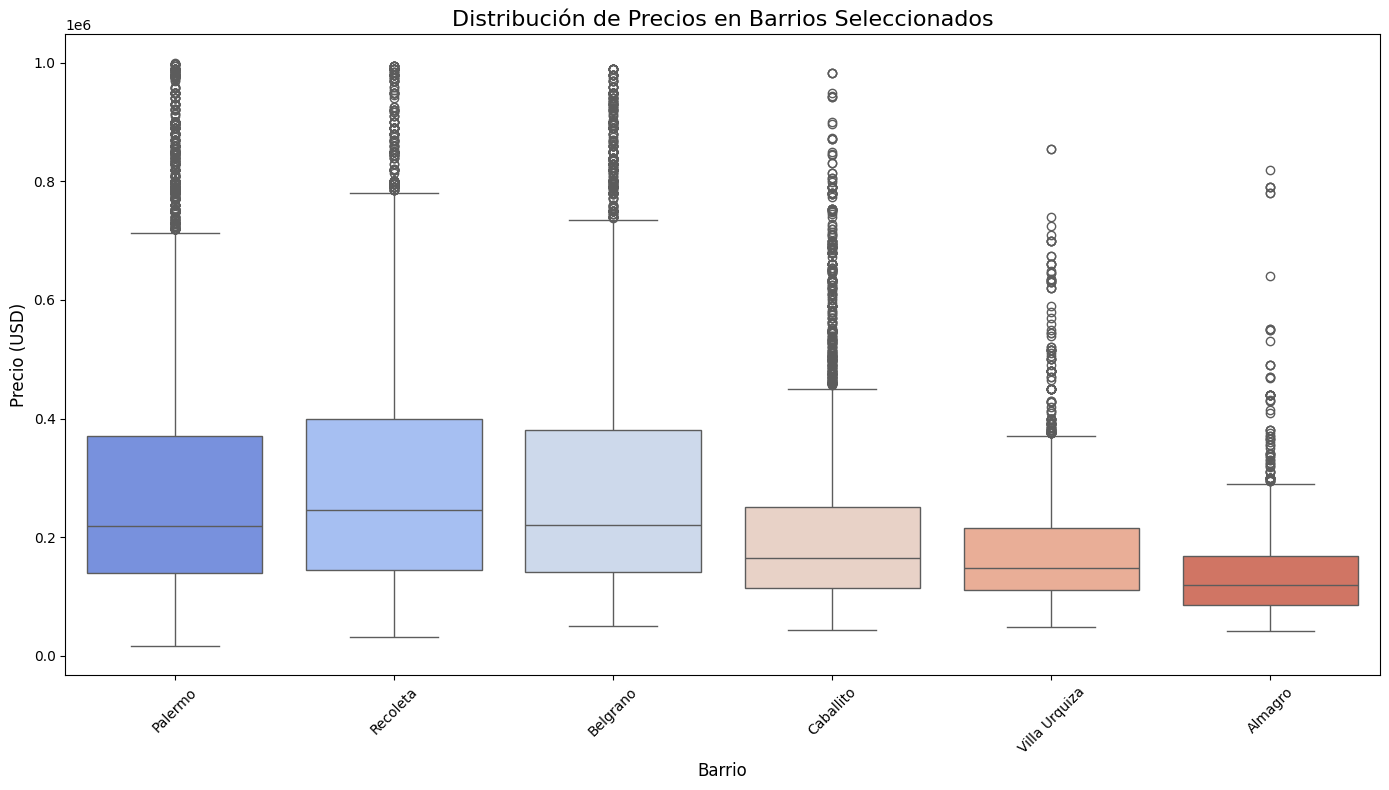

In [8]:
barrios_seleccionados = ['Palermo', 'Recoleta', 'Belgrano', 'Caballito', 'Villa Urquiza', 'Almagro']
query_dist = f"""
    SELECT barrio, price_usd
    FROM propiedades
    WHERE barrio IN ({str(barrios_seleccionados)[1:-1]})
    AND price_usd IS NOT NULL AND price_usd < 1000000;
"""
df_dist = pd.read_sql(query_dist, conn)

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_dist, x='barrio', y='price_usd', palette="coolwarm")
plt.title('Distribución de Precios en Barrios Seleccionados', fontsize=16)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Precio (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "distribucion_precios_barrios.png"))
plt.show()

### 5.3. Correlación entre Características Numéricas
Un heatmap de correlación nos permite identificar rápidamente qué variables se mueven juntas. Una correlación cercana a 1 (rojo intenso) o -1 (azul intenso) indica una relación fuerte, mientras que valores cercanos a 0 indican una relación débil.

/var/folders/nd/dy1shnbn2797hcxgrvjct5gh0000gn/T/ipykernel_4548/2923443384.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_corr = pd.read_sql(query_corr, conn)


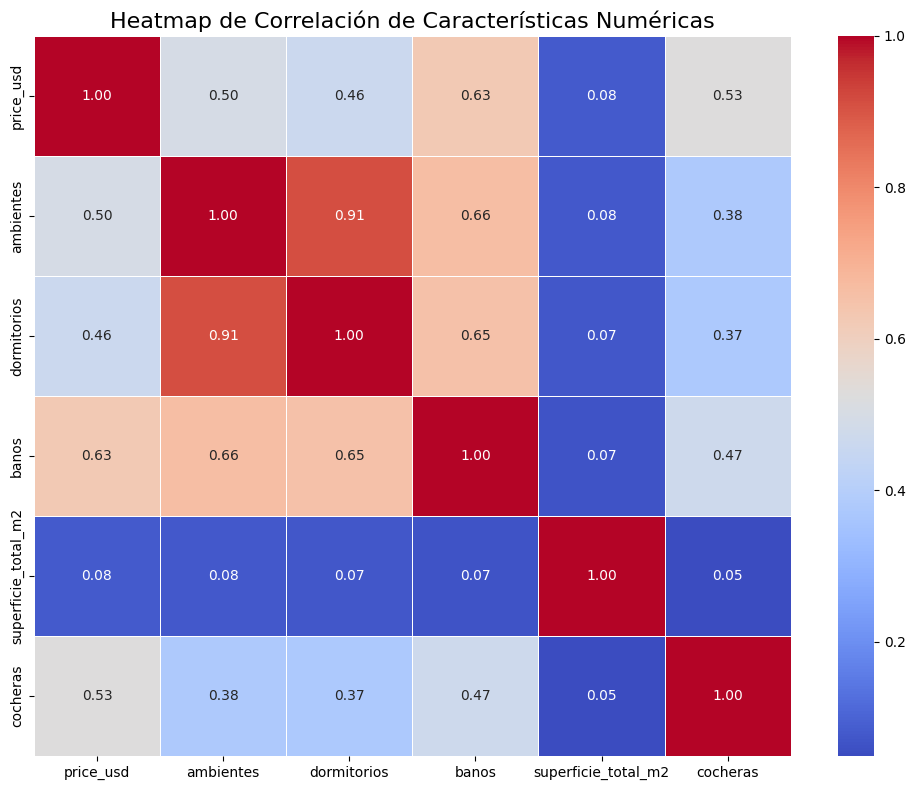

Conexión a la base de datos cerrada.


In [9]:
query_corr = """
    SELECT price_usd, ambientes, dormitorios, banos, superficie_total_m2, cocheras
    FROM propiedades
    WHERE price_usd IS NOT NULL;
"""
df_corr = pd.read_sql(query_corr, conn)

corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Correlación de Características Numéricas', fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "correlacion_heatmap.png"))
plt.show()

# Cerrar la conexión a la base de datos
if conn.is_connected():
    conn.close()
    print("Conexión a la base de datos cerrada.")